In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

from lusi.svm import *
from lusi.invariants import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get the data and split it in train and test
X, y = diabetes_df.drop('Outcome', axis=1).values, diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)

In [4]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
encoding = np.array([[0., 1.], [1., 0.]])

In [6]:
# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariantsECOC(encoding=encoding, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)


Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:19<00:00,  7.17it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:32<00:00,  6.54it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:54<00:00,  5.74it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:29<00:00,  6.69it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:09<00:00,  5.29it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:38<00:00,  4.58it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:23<00:00,  4.92it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:35<00:00,  4.63it/s]


[]

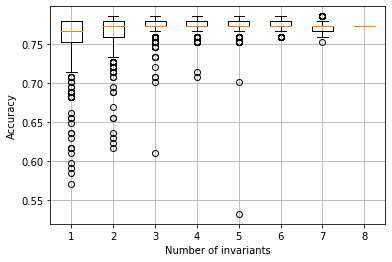

In [7]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

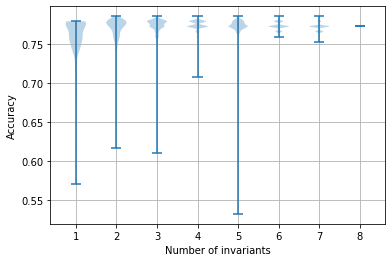

In [8]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

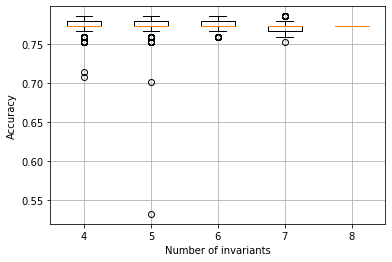

In [9]:
plt.boxplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

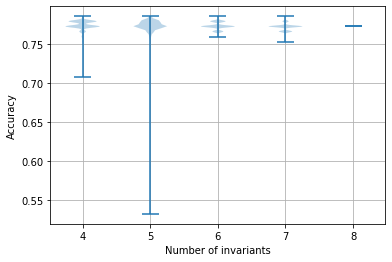

In [10]:
plt.violinplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [11]:
svm_baseline = SVMRandomInvariants(invariant_type=InvariantTypes.HYPERPLANE, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 276
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 424
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 2
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 468
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 8
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 402
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 18
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 332
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 21
Max. accuracy: 0.7857142857142857

Number of

In [12]:
# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariantsECOC(encoding=encoding, invariant_type=InvariantTypes.HYPERPLANE, C=1, kernel='rbf', gamma='auto', delta=0.3, num_invariants=num_invariants)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:48<00:00,  4.37it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:53<00:00,  3.40it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:39<00:00,  1.92it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:48<00:00,  1.54it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:34<00:00,  1.23it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [14:46<00:00,  1.13it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [15:28<00:00,  1.08it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [15:01<00:00,  1.11it/s]


[]

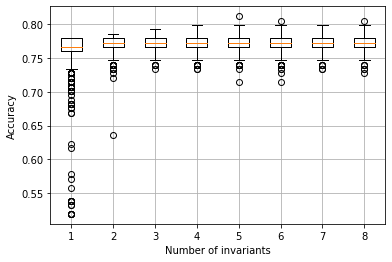

In [13]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

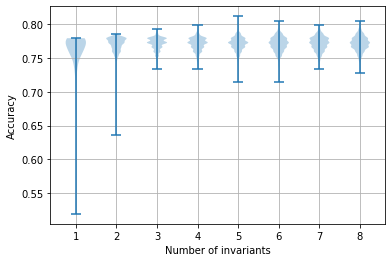

In [14]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

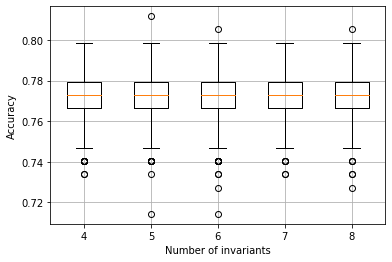

In [15]:
plt.boxplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

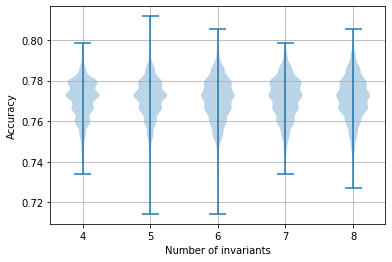

In [16]:
plt.violinplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [17]:
svm_baseline = SVMRandomInvariants(invariant_type=InvariantTypes.HYPERPLANE, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 277
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 357
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 21
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 340
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 37
Max. accuracy: 0.7922077922077922

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 318
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 60
Max. accuracy: 0.7987012987012987

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 304
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 91
Max. accuracy: 0.8116883116883117

Number 

# Trying different train/test partitions

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariantsECOC(encoding=encoding, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.40it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.97it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 16.98it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 14.95it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.39it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 12.02it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.81it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:45<00:00,  9.44it/s]


[]

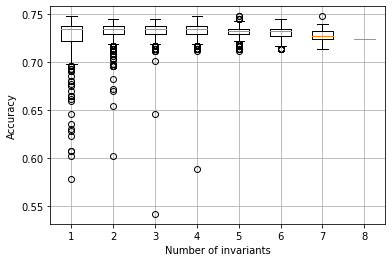

In [19]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

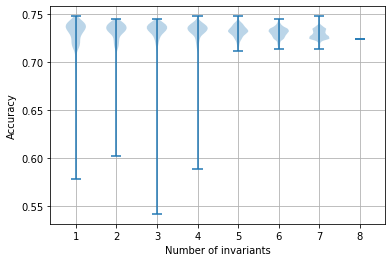

In [20]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

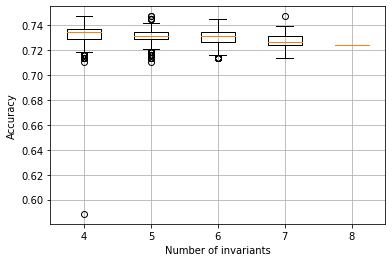

In [21]:
plt.boxplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

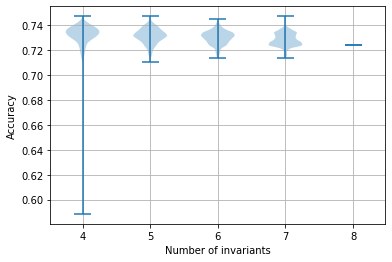

In [22]:
plt.violinplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [23]:
svm_baseline = SVMRandomInvariants(invariant_type=InvariantTypes.HYPERPLANE, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7421875

Number of elements with accuracy >= 0.7421875 using 1 invariants: 114
Number of elements with accuracy > 0.7421875 using 1 invariants: 18
Max. accuracy: 0.7473958333333334

Number of elements with accuracy >= 0.7421875 using 2 invariants: 87
Number of elements with accuracy > 0.7421875 using 2 invariants: 19
Max. accuracy: 0.7447916666666666

Number of elements with accuracy >= 0.7421875 using 3 invariants: 76
Number of elements with accuracy > 0.7421875 using 3 invariants: 17
Max. accuracy: 0.7447916666666666

Number of elements with accuracy >= 0.7421875 using 4 invariants: 61
Number of elements with accuracy > 0.7421875 using 4 invariants: 8
Max. accuracy: 0.7473958333333334

Number of elements with accuracy >= 0.7421875 using 5 invariants: 39
Number of elements with accuracy > 0.7421875 using 5 invariants: 6
Max. accuracy: 0.7473958333333334

Number of elements with accuracy >= 0.7421875 using 6 invariants: 18
Number of elements with accuracy > 0.74218

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariantsECOC(encoding=encoding, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.99it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.61it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 26.05it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.09it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.10it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.79it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 15.08it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.36it/s]


[]

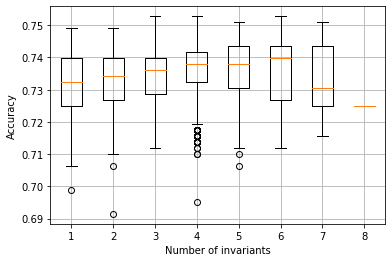

In [25]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

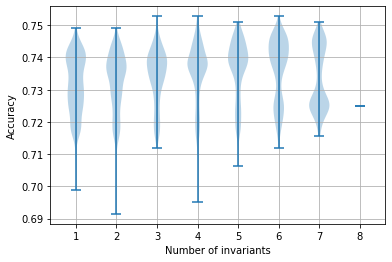

In [26]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

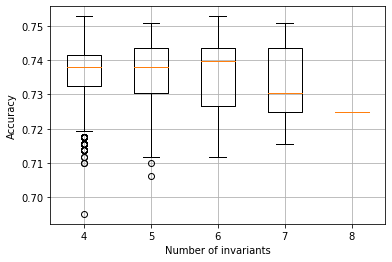

In [27]:
plt.boxplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

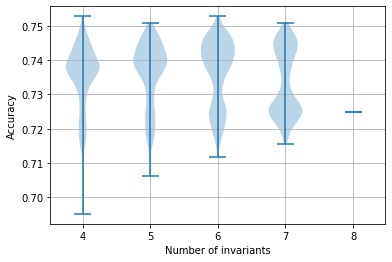

In [28]:
plt.violinplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [29]:
svm_baseline = SVMRandomInvariants(invariant_type=InvariantTypes.HYPERPLANE, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.741635687732342

Number of elements with accuracy >= 0.741635687732342 using 1 invariants: 194
Number of elements with accuracy > 0.741635687732342 using 1 invariants: 105
Max. accuracy: 0.7490706319702602

Number of elements with accuracy >= 0.741635687732342 using 2 invariants: 182
Number of elements with accuracy > 0.741635687732342 using 2 invariants: 110
Max. accuracy: 0.7490706319702602

Number of elements with accuracy >= 0.741635687732342 using 3 invariants: 216
Number of elements with accuracy > 0.741635687732342 using 3 invariants: 128
Max. accuracy: 0.7527881040892194

Number of elements with accuracy >= 0.741635687732342 using 4 invariants: 273
Number of elements with accuracy > 0.741635687732342 using 4 invariants: 199
Max. accuracy: 0.7527881040892194

Number of elements with accuracy >= 0.741635687732342 using 5 invariants: 371
Number of elements with accuracy > 0.741635687732342 using 5 invariants: 264
Max. accuracy: 0.7509293680297398

Number of el

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariantsECOC(encoding=encoding, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.56it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.30it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.69it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 31.01it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.55it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.47it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:53<00:00, 18.55it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.29it/s]


[]

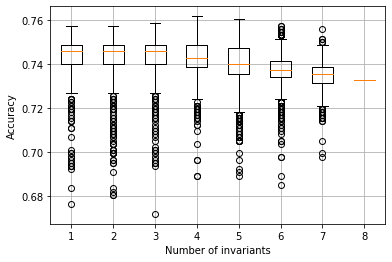

In [31]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

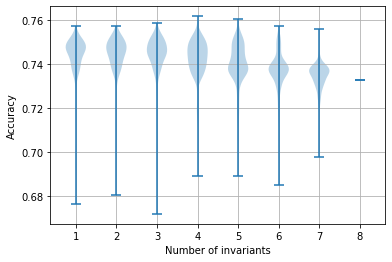

In [32]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

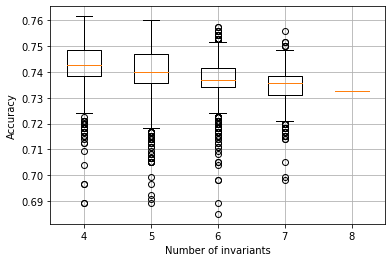

In [33]:
plt.boxplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

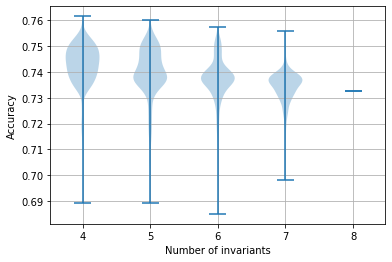

In [34]:
plt.violinplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [35]:
svm_baseline = SVMRandomInvariants(invariant_type=InvariantTypes.HYPERPLANE, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7456647398843931

Number of elements with accuracy >= 0.7456647398843931 using 1 invariants: 564
Number of elements with accuracy > 0.7456647398843931 using 1 invariants: 462
Max. accuracy: 0.7572254335260116

Number of elements with accuracy >= 0.7456647398843931 using 2 invariants: 536
Number of elements with accuracy > 0.7456647398843931 using 2 invariants: 445
Max. accuracy: 0.7572254335260116

Number of elements with accuracy >= 0.7456647398843931 using 3 invariants: 528
Number of elements with accuracy > 0.7456647398843931 using 3 invariants: 427
Max. accuracy: 0.7586705202312138

Number of elements with accuracy >= 0.7456647398843931 using 4 invariants: 428
Number of elements with accuracy > 0.7456647398843931 using 4 invariants: 347
Max. accuracy: 0.7615606936416185

Number of elements with accuracy >= 0.7456647398843931 using 5 invariants: 304
Number of elements with accuracy > 0.7456647398843931 using 5 invariants: 257
Max. accuracy: 0.7601156069364162

N

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariantsECOC(encoding=encoding, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 98.47it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.38it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.48it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.72it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.15it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 22.96it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.63it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.22it/s]


[]

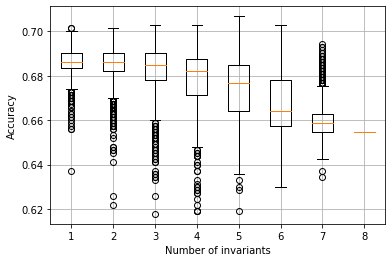

In [37]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

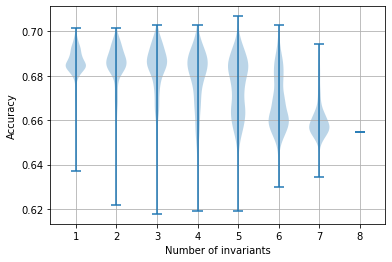

In [38]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

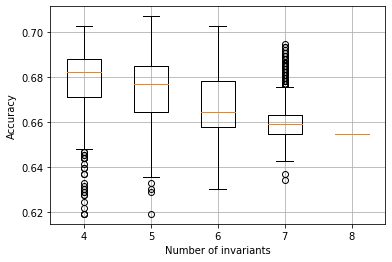

In [39]:
plt.boxplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

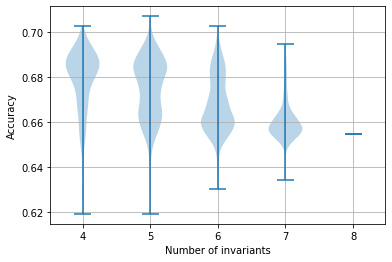

In [40]:
plt.violinplot(accuracies[3:], positions=range(4, len(accuracies) + 1))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [41]:
svm_baseline = SVMRandomInvariants(invariant_type=InvariantTypes.HYPERPLANE, C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.684931506849315

Number of elements with accuracy >= 0.684931506849315 using 1 invariants: 644
Number of elements with accuracy > 0.684931506849315 using 1 invariants: 503
Max. accuracy: 0.7013698630136986

Number of elements with accuracy >= 0.684931506849315 using 2 invariants: 620
Number of elements with accuracy > 0.684931506849315 using 2 invariants: 527
Max. accuracy: 0.7013698630136986

Number of elements with accuracy >= 0.684931506849315 using 3 invariants: 562
Number of elements with accuracy > 0.684931506849315 using 3 invariants: 478
Max. accuracy: 0.7027397260273973

Number of elements with accuracy >= 0.684931506849315 using 4 invariants: 424
Number of elements with accuracy > 0.684931506849315 using 4 invariants: 369
Max. accuracy: 0.7027397260273973

Number of elements with accuracy >= 0.684931506849315 using 5 invariants: 294
Number of elements with accuracy > 0.684931506849315 using 5 invariants: 246
Max. accuracy: 0.7068493150684931

Number of el